In [1]:
import pandas as pd
import numpy as np

In [2]:
#df= pd.read_csv('feature_vectors_syscalls_frequency_5_Cat.csv')
df=pd.read_csv('feature_vectors_syscallsbinders_frequency_5_Cat.csv')
#df2=df2.drop(columns=['Class'])
for i in range(0,11598):
    if int(df.at[i,'Class'])<5:
        df.at[i,'Class']=1
    else:
        df.at[i,'Class']=0
#df = pd.concat([df, df2], axis=1)

In [3]:
X=df.loc[:, df.columns != 'Class']
X

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,updateServiceLocation,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,0,37,10
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,0,2,2838,46
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,0,1,111,20
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,0,7,987,197
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,0,1,98,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,2,0,0,11,0,61,13,0,66,17,...,0,0,0,0,0,0,0,10,2764,236
11594,6,0,0,10,1,69,50,1,118,15,...,0,0,0,0,0,1,0,5,4417,295
11595,0,0,0,0,0,21,16,0,48,9,...,0,0,0,0,0,0,0,5,241,67
11596,1,0,0,15,0,90,80,0,239,50,...,0,0,0,0,0,0,0,3,1703,774


In [4]:
Y=df.loc[:,'Class']
Y

0        1
1        1
2        1
3        1
4        1
        ..
11593    0
11594    0
11595    0
11596    0
11597    0
Name: Class, Length: 11598, dtype: int64

In [5]:
import tracemalloc
import os
import psutil
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
k=df[df.columns[1:]].corr()['Class'][:]
c=1
indexl=[]
for x in k:
    c=c+1
    if abs(x)<0.037:
        #print(c)
        indexl.append(c)
        #c=c+1
        #print(abs(x))

In [6]:
df.drop(df.columns[indexl], axis = 1, inplace=True)
X=df.loc[:, df.columns != 'Class']

In [7]:
folder='Shafin'

In [8]:
import tracemalloc
import os
import psutil
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix



In [9]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [10]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('rf', RandomForestClassifier()))
	level0.append(('lgb', lgb.LGBMClassifier()))
	level0.append(('etc', ExtraTreesClassifier()))
	level0.append(('bag', BaggingClassifier()))
	#level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	#model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	model = StackingClassifier(estimators=level0, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['rf'] = RandomForestClassifier()
	models['lgb'] = lgb.LGBMClassifier()
	models['etc'] =  ExtraTreesClassifier()
	models['bag'] = BaggingClassifier()
	#models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    #scoresp = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    #scoresa = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    #scoresf = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores 

>rf 0.9732 (0.0040)
>lgb 0.9767 (0.0036)
>etc 0.9699 (0.0039)
>bag 0.9703 (0.0042)
>stacking 0.9756 (0.0035)
time  1.875
memory (705002, 18514763)


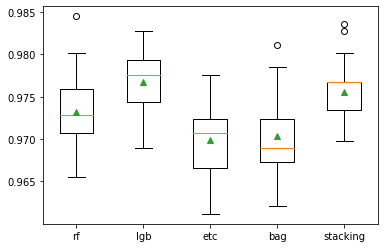

In [11]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [12]:

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    #scoresa = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    #scoresf = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores 

In [ ]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>rf 0.9769 (0.0036)
>lgb 0.9814 (0.0033)
>etc 0.9752 (0.0038)
>bag 0.9810 (0.0036)


In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    #scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    #scoresf = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores

In [ ]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    #scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    #scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()